In [19]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import seaborn as sns
import matplotlib.pyplot as plt

# connect to the database
database = 'sales_dashboard'
username = 'root'
password = quote_plus('Chodrykhan@880')
host = 'localhost'
port = 3306


engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

query = "select * from sales_data;"

# read the data from the database
df = pd.read_sql(query, engine)
print(df.shape)
print(df.dtypes)
print(df.head())



(500, 10)
order_id            int64
customer_id         int64
region             object
category           object
product            object
quantity            int64
price_per_unit    float64
sales             float64
profit            float64
order_date         object
dtype: object
   order_id  customer_id region         category  product  quantity  \
0      1006          655  South       Technology  Printer         8   
1      1018          711  South  Office Supplies  Stapler         1   
2      1046          566   East  Office Supplies    Paper         9   
3      1053          988   West       Technology  Monitor         4   
4      1058          670   West  Office Supplies  Stapler         5   

   price_per_unit    sales   profit  order_date  
0          340.23  2721.84   430.38  2024-08-30  
1          443.76   443.76   109.36  2024-06-01  
2          415.44  3738.96  1091.60  2024-12-06  
3          257.78  1031.12   118.63  2025-02-15  
4          178.46   892.30   116.20  20

Data Cleaning

In [17]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
# Basic info
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        500 non-null    int64         
 1   customer_id     500 non-null    int64         
 2   region          500 non-null    object        
 3   category        500 non-null    object        
 4   product         500 non-null    object        
 5   quantity        500 non-null    int64         
 6   price_per_unit  500 non-null    float64       
 7   sales           500 non-null    float64       
 8   profit          500 non-null    float64       
 9   order_date      500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 39.2+ KB
None
         order_id  customer_id    quantity  price_per_unit        sales  \
count   500.00000   500.000000  500.000000      500.000000   500.000000   
mean   5483.81800   749.500000    

Sales Over Time

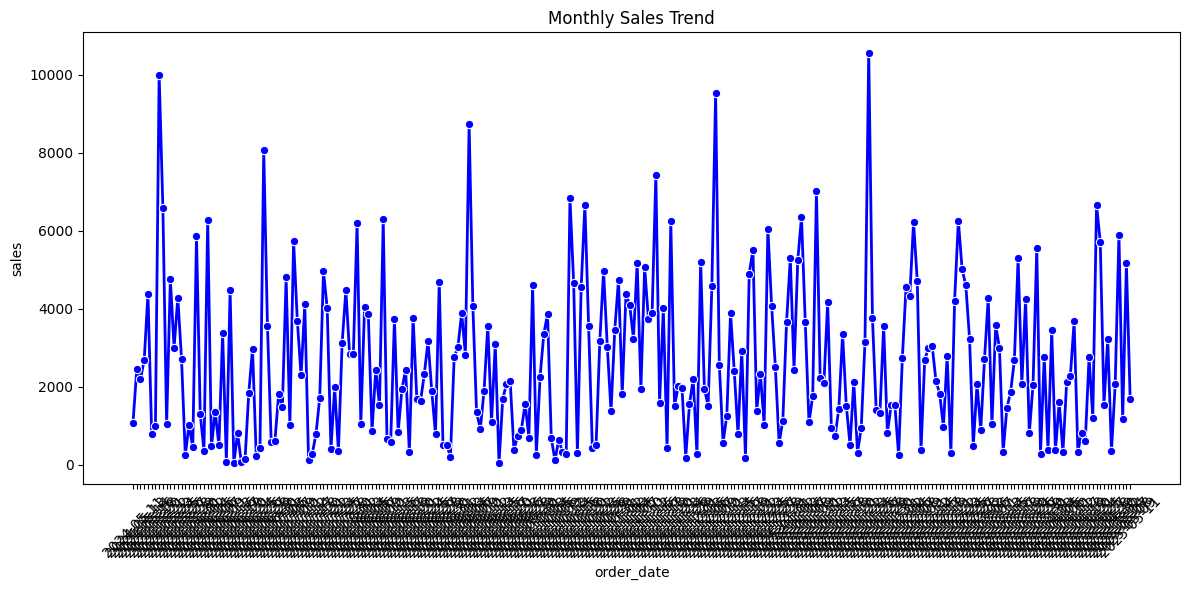

In [36]:
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.groupby('order_date')['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['order_date'].astype(str), y=monthly_sales['sales'], marker='o', color='blue', linewidth=2)
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/monthly_sales_trend.png')
plt.show()
plt.close()


Sales By Region

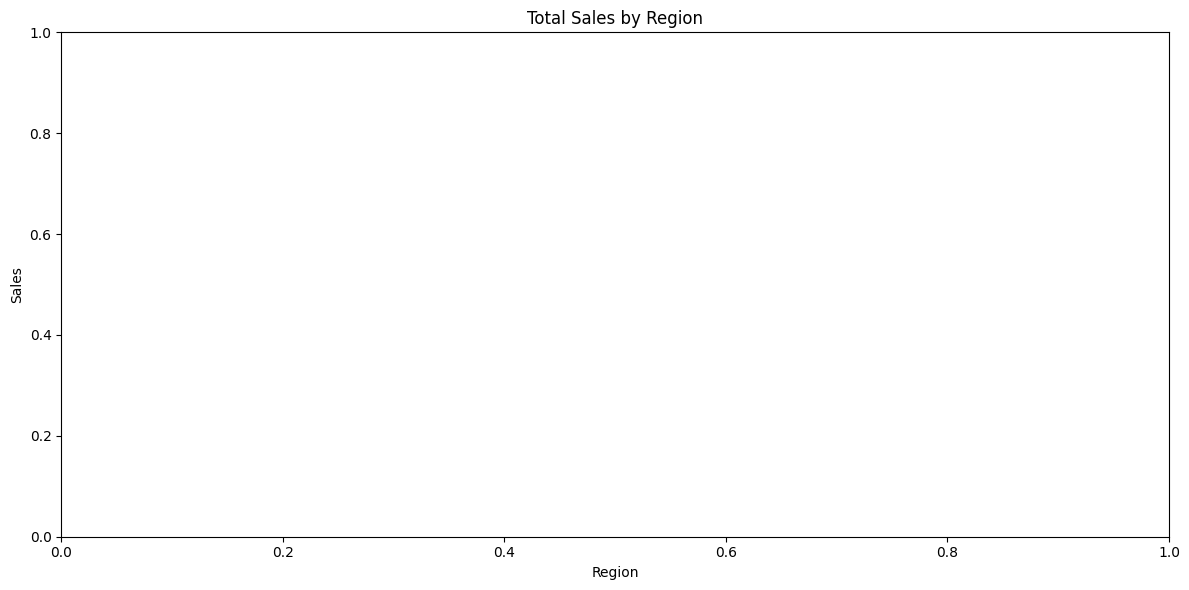

In [ ]:
region_sales = df['region'] = df.groupby('region')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('../visuals/region_sales.png')
plt.show()
plt.close()

Top Selling Categories

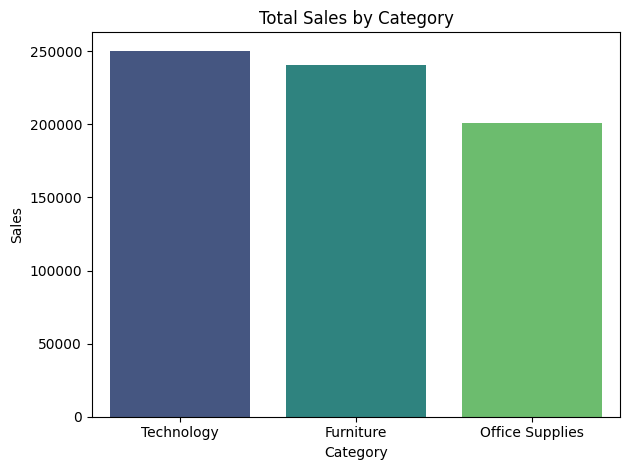

In [38]:
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.Figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis', hue=category_sales.index)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('../visuals/category_sales.png')
plt.show()
plt.close()

Profit Analysis

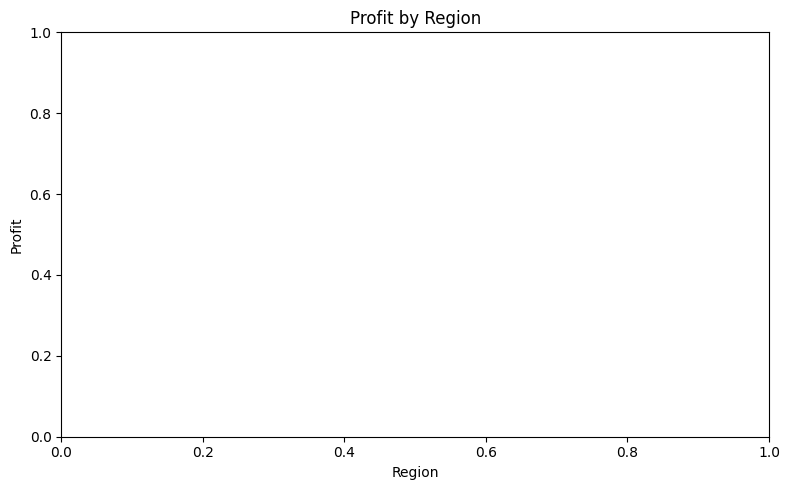

In [42]:
profit_by_region = df.groupby('region')['profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette='Set2')
plt.title('Profit by Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.tight_layout()
plt.show()
